In [1]:
# Load all libraries

import pandas as pd
import sys 
import numpy as np
import seaborn as sns
from math import sqrt
from pylab import rcParams

from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import f_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.linear_model import LassoCV
from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.kernel_ridge import KernelRidge



from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
plt.rcParams["figure.figsize"] = (8, 6)


In [2]:
# df - train dataset
# sub - test dataset

df = pd.read_csv('C:/datasets/spaceship-titanic/train.csv')
sub = pd.read_csv('C:/datasets/spaceship-titanic/test.csv')

In [3]:
df = df.drop('PassengerId', axis=1)
sub = sub.drop('PassengerId', axis=1)

In [4]:
cat_cols = df.dtypes[df.dtypes == 'object'].index.tolist()

In [5]:
num_cols = ((df.dtypes[df.dtypes != 'object'])[:-1]).index.tolist()

In [6]:
df[cat_cols].isna().sum()
# for col in cat_cols:
#     df[col] = df[col].fillna('None')
#     df = df.drop(df[df[col] == 'None'].index, axis=0)

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
VIP            203
Name           200
dtype: int64

In [7]:
df['VIP'].value_counts()

False    8291
True      199
Name: VIP, dtype: int64

In [8]:
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode().tolist()[0])

In [9]:
for col in cat_cols:
    sub[col] = sub[col].fillna(sub[col].mode().tolist()[0])

In [10]:
for col in df.dtypes.index.tolist():
    print(df[col].value_counts())
    print('\n')
    print('\n')

Earth     4803
Europa    2131
Mars      1759
Name: HomePlanet, dtype: int64




False    5656
True     3037
Name: CryoSleep, dtype: int64




G/734/S     207
C/21/P        7
B/201/P       7
G/1368/P      7
E/13/S        7
           ... 
G/556/P       1
E/231/S       1
G/545/S       1
G/543/S       1
F/947/P       1
Name: Cabin, Length: 6560, dtype: int64




TRAPPIST-1e      6097
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64




24.0    324
18.0    320
21.0    311
19.0    293
23.0    292
       ... 
72.0      4
78.0      3
79.0      3
76.0      2
77.0      2
Name: Age, Length: 80, dtype: int64




False    8494
True      199
Name: VIP, dtype: int64




0.0       5577
1.0        117
2.0         79
3.0         61
4.0         47
          ... 
1612.0       1
2598.0       1
632.0        1
378.0        1
745.0        1
Name: RoomService, Length: 1273, dtype: int64




0.0       5456
1.0        116
2.0         75
3.0         53
4.0         53
          ... 
384

In [11]:
# HomePlanet - one hot encoding
# CryoSleep - binary label encoding
# Cabin - Text vectorizer --- questionable
# Destination - one hot encoding
# VIP - binary label encoding
# Name - Text Vectorizer --- questionable

In [12]:
# OneHotEncoding categorical data to get rid of text info for TRAIN DATA
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df = df.drop('HomePlanet', axis=1)
df = df.reset_index()
for col in transformed.columns:
    df[col] = transformed[col].copy() 
df = df.drop('index', axis=1)

# OneHotEncoding categorical data to get rid of text info for TEST DATA
transformed = ohe.transform(sub['HomePlanet'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub = sub.drop('HomePlanet', axis=1)
sub = sub.reset_index()
for col in transformed.columns:
    sub[col] = transformed[col].copy() 
sub = sub.drop('index', axis=1)

In [13]:
# Binary Encoding for two-class categorical feature for TRAIN DATA
le = LabelEncoder()
transformed = le.fit_transform(df['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
df = df.drop('CryoSleep', axis=1)
df = df.reset_index()
df['CryoSleep'] = transformed['CryoSleep'].copy() 
df = df.drop('index', axis=1)

# Binary Encoding for two-class categorical feature for TEST DATA
transformed = le.transform(sub['CryoSleep'])
transformed = pd.DataFrame(transformed).rename(columns={0:'CryoSleep'})
sub = sub.drop('CryoSleep', axis=1)
sub = sub.reset_index()
sub['CryoSleep'] = transformed['CryoSleep'].copy() 
sub = sub.drop('index', axis=1)

In [14]:
# OneHotEncoding categorical data to get rid of text info for TRAIN DATA
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df = df.drop('Destination', axis=1)
df = df.reset_index()
for col in transformed.columns:
    df[col] = transformed[col].copy() 
df = df.drop('index', axis=1)

# OneHotEncoding categorical data to get rid of text info for TEST DATA
transformed = ohe.transform(sub['Destination'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub = sub.drop('Destination', axis=1)
sub = sub.reset_index()
for col in transformed.columns:
    sub[col] = transformed[col].copy() 
sub = sub.drop('index', axis=1)

In [15]:
# Binary Encoding for two-class categorical feature for TRAIN DATA
le = LabelEncoder()
transformed = le.fit_transform(df['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
df = df.drop('VIP', axis=1)
df = df.reset_index()
df['VIP'] = transformed['VIP'].copy() 
df = df.drop('index', axis=1)

# Binary Encoding for two-class categorical feature for TEST DATA
transformed = le.transform(sub['VIP'])
transformed = pd.DataFrame(transformed).rename(columns={0:'VIP'})
sub = sub.drop('VIP', axis=1)
sub = sub.reset_index()
sub['VIP'] = transformed['VIP'].copy() 
sub = sub.drop('index', axis=1)

In [16]:
col_1, col_2, col_3 = [], [], []
for i in range(df['Cabin'].shape[0]):
    str_lst = df['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
df['1Cabin_Class1'] = col_1
df['2Cabin_Seat'] = col_2
df['3Cabin_Option'] = col_3

In [17]:
col_1, col_2, col_3 = [], [], []
for i in range(sub['Cabin'].shape[0]):
    str_lst = sub['Cabin'].iloc[i].split('/')
    col_1.append(str_lst[0])
    col_2.append(str_lst[1])
    col_3.append(str_lst[2])
col_1 = pd.DataFrame(col_1)
col_2 = pd.DataFrame(col_2)
col_3 = pd.DataFrame(col_3)
sub['1Cabin_Class1'] = col_1
sub['2Cabin_Seat'] = col_2
sub['3Cabin_Option'] = col_3

In [18]:
df['1Cabin_Class1'].value_counts()

F    2794
G    2758
E     876
B     779
C     747
D     478
A     256
T       5
Name: 1Cabin_Class1, dtype: int64

In [19]:
df['2Cabin_Seat'].value_counts()

734     208
82       28
86       22
19       22
56       21
       ... 
1644      1
1515      1
1639      1
1277      1
1894      1
Name: 2Cabin_Seat, Length: 1817, dtype: int64

In [20]:
df['3Cabin_Option'].value_counts()

S    4487
P    4206
Name: 3Cabin_Option, dtype: int64

In [21]:
df = df.drop('Cabin', axis=1)

In [22]:
sub = sub.drop('Cabin', axis=1)

In [23]:
# Binary Encoding for two-class categorical feature for TRAIN DATA
le = LabelEncoder()
transformed = le.fit_transform(df['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
df = df.drop('3Cabin_Option', axis=1)
df = df.reset_index()
df['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
df = df.drop('index', axis=1)

# Binary Encoding for two-class categorical feature for TEST DATA
transformed = le.transform(sub['3Cabin_Option'])
transformed = pd.DataFrame(transformed).rename(columns={0:'3Cabin_Option'})
sub = sub.drop('3Cabin_Option', axis=1)
sub = sub.reset_index()
sub['3Cabin_Option'] = transformed['3Cabin_Option'].copy() 
sub = sub.drop('index', axis=1)

In [24]:
# OneHotEncoding categorical data to get rid of text info for TRAIN DATA
ohe = OneHotEncoder()
transformed = ohe.fit_transform(df['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
df = df.drop('1Cabin_Class1', axis=1)
df = df.reset_index()
for col in transformed.columns:
    df[col] = transformed[col].copy() 
df = df.drop('index', axis=1)

# OneHotEncoding categorical data to get rid of text info for TEST DATA
transformed = ohe.transform(sub['1Cabin_Class1'].to_numpy().reshape(-1, 1))
transformed = pd.DataFrame(transformed.toarray())
for i in range(0,transformed.shape[1]):
    transformed = transformed.rename(columns={i:((ohe.get_feature_names_out())[i][3:])})
sub = sub.drop('1Cabin_Class1', axis=1)
sub = sub.reset_index()
for col in transformed.columns:
    sub[col] = transformed[col].copy() 
sub = sub.drop('index', axis=1)

In [25]:
df['2Cabin_Seat'] = df['2Cabin_Seat'].astype('float64')
sub['2Cabin_Seat'] = sub['2Cabin_Seat'].astype('float64')

In [26]:
df = df.drop('Name', axis=1)
sub = sub.drop('Name', axis=1)

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


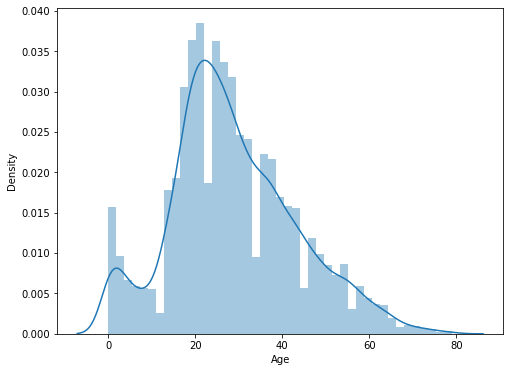

mean_absolute_error 11.723546682325308
mean_squared_error 219.50675278919553
r2_score -0.013925364469763224


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:85: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


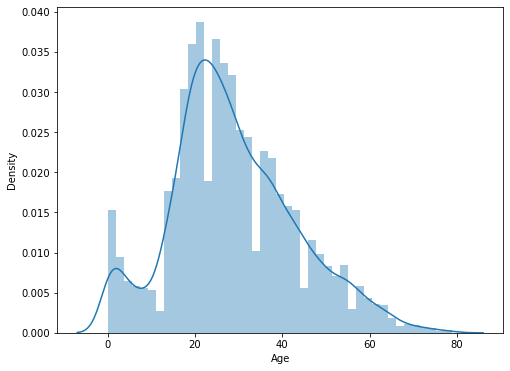

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


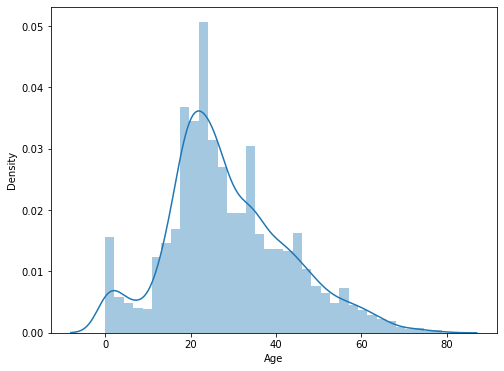

mean_absolute_error 11.036992840095465
mean_squared_error 199.42668257756566
r2_score -0.07387904685991953


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:180: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


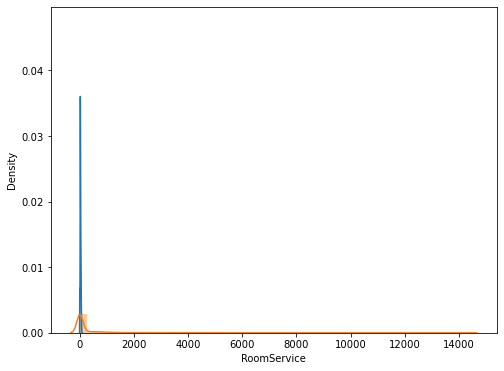

mean_absolute_error 252.92307692307693
mean_squared_error 339942.993118027
r2_score 0.0658355665507645


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:273: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


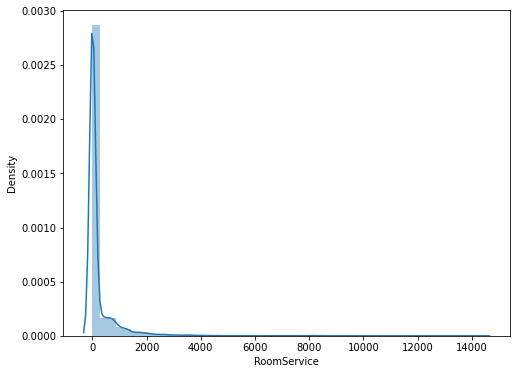

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


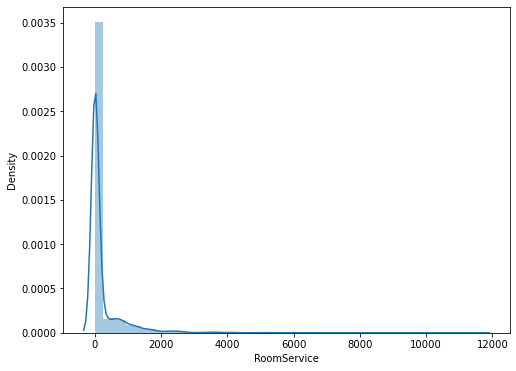

mean_absolute_error 259.8941597139452
mean_squared_error 351667.27771156136
r2_score -0.023742307060312662


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:368: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


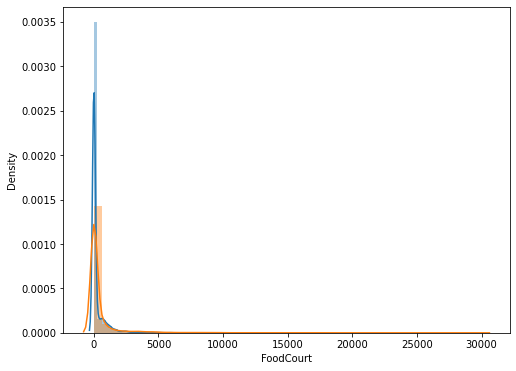

mean_absolute_error 484.41809635722683
mean_squared_error 1752090.297015276
r2_score 0.10682822778567203


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:461: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


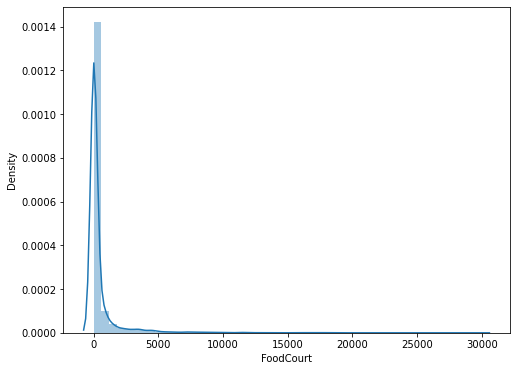

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


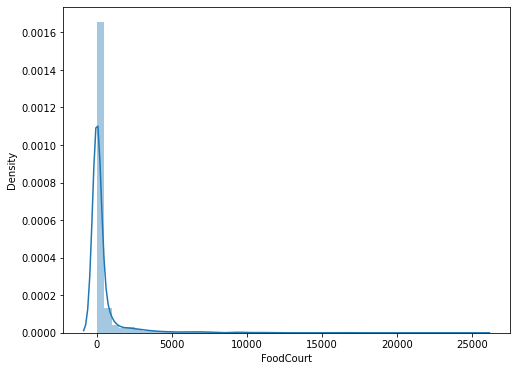

mean_absolute_error 484.15161676646704
mean_squared_error 1510299.3153053892
r2_score 0.08369409014401641


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:556: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


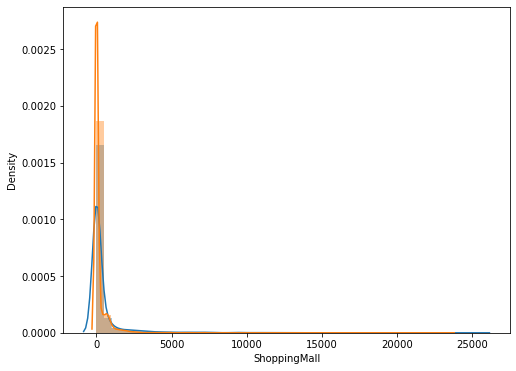

mean_absolute_error 213.25668827342366
mean_squared_error 323694.57218621095
r2_score -0.07061152896082046


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:649: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


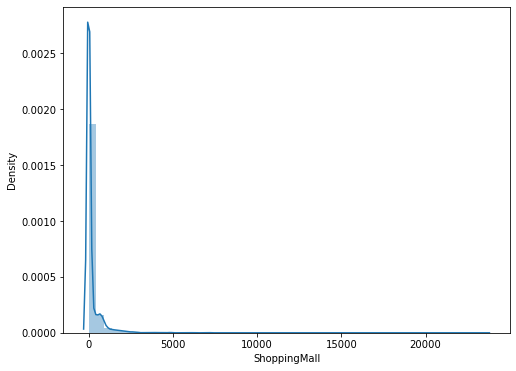

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


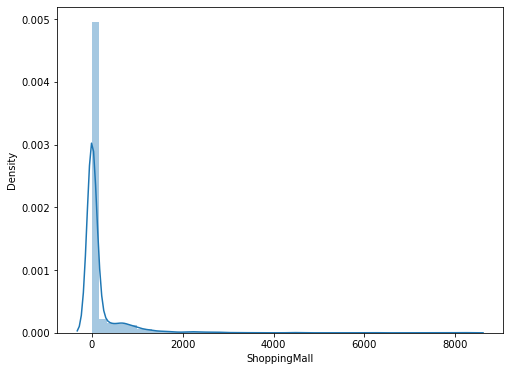

mean_absolute_error 205.34928229665073
mean_squared_error 299599.44784689
r2_score 0.015670395187153074


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:744: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


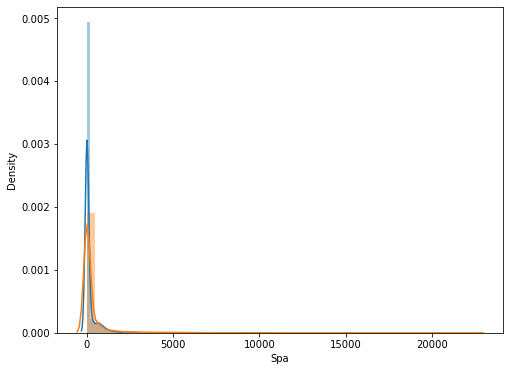

mean_absolute_error 352.6418331374853
mean_squared_error 854285.8328084606
r2_score -0.01634162794591809


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:837: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


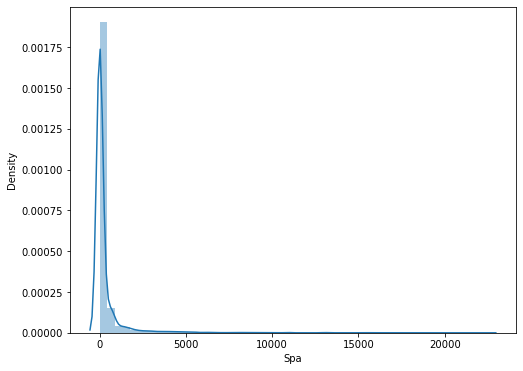

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


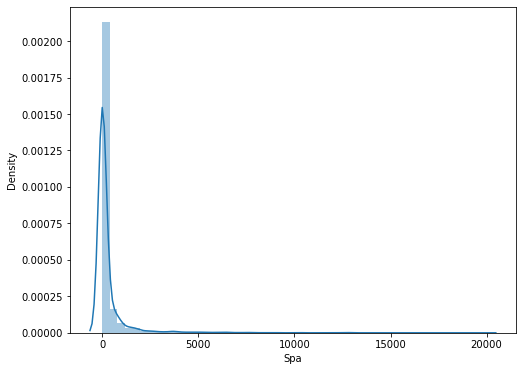

mean_absolute_error 348.3299043062201
mean_squared_error 768842.4929665072
r2_score 0.11533809685648921


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:932: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


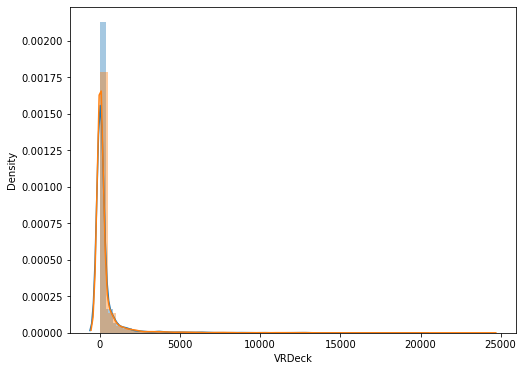

mean_absolute_error 369.3461493239271
mean_squared_error 1074437.7319929453
r2_score 0.030224714702584476


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:1025: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


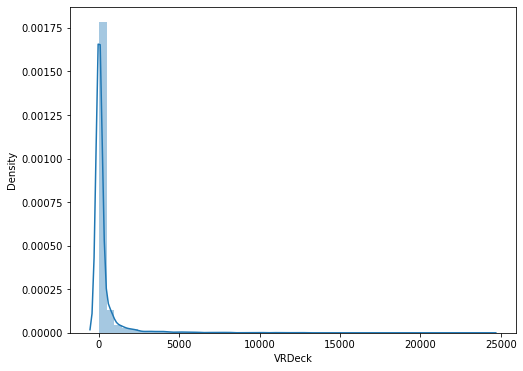

C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


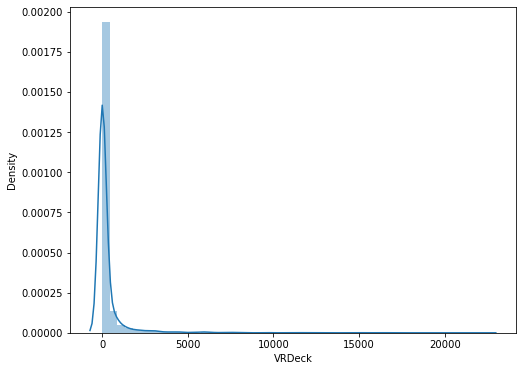

mean_absolute_error 357.1764285714285
mean_squared_error 1214131.073952381
r2_score -0.02115551021204931


C:\Users\TimK\AppData\Local\Temp\ipykernel_8868\3557007610.py:1120: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'],
C:\Users\TimK\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='VRDeck', ylabel='Density'>

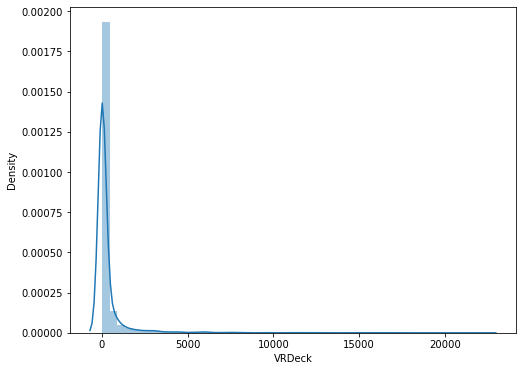

In [27]:
# KNN Imputation on df['Age']
sns.distplot(df['Age'])
plt.show()

df['Age'] = df['Age'].fillna(-537)
Age_filler = df.drop(list(df[df['Age'] == (-537)].index), axis=0)

Age_begin = df.drop(list(df[df['Age'] != (-537)].index), axis=0)

X_Age_final = Age_filler.drop('Age', axis=1)

y_Age_final = Age_filler['Age']

X_Age_to_insert = Age_begin.drop('Age', axis=1)

X_Age_final = pd.get_dummies(X_Age_final)
X_Age_to_insert_final = pd.get_dummies(X_Age_to_insert)

train_cols = X_Age_final.columns
test_cols = X_Age_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_final = X_Age_final.drop(list(train_not_test),axis=1)

train_cols = X_Age_to_insert_final.columns
test_cols = X_Age_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_to_insert_final = X_Age_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Age_final)

old_ind = X_Age_final.index

X_Age_final = imp.transform(X_Age_final)

X_Age_final = pd.DataFrame(X_Age_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_final = X_Age_final.rename(columns={i:featnam[i]})

X_Age_final['index1'] = old_ind
X_Age_final = X_Age_final.set_index('index1')

X_Age_final.index.name = None

old_ind = X_Age_to_insert_final.index
X_Age_to_insert_final= imp.transform(X_Age_to_insert_final)

X_Age_to_insert_final= pd.DataFrame(X_Age_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_to_insert_final = X_Age_to_insert_final.rename(columns={i:featnam[i]})

X_Age_to_insert_final['index1'] = old_ind
X_Age_to_insert_final = X_Age_to_insert_final.set_index('index1')

X_Age_to_insert_final.index.name = None

X_Age_train, X_Age_test, y_Age_train, y_Age_test = train_test_split(X_Age_final, y_Age_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Age_train, y_Age_train)

knnreg.score(X_Age_test, y_Age_test)

print(f"mean_absolute_error {mean_absolute_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"mean_squared_error {mean_squared_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"r2_score {r2_score(y_Age_test, knnreg.predict(X_Age_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Age_to_insert_final))

put_to['index1'] = Age_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Age'})
put_to.index.name = None

Age_final = Age_begin.copy()

conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'], 
                  ignore_index = False),columns=['Age'])

conc = conc.sort_index(axis=0)

df['Age'] = conc['Age']

sns.distplot(df['Age'])
plt.show()

# KNN Imputation on sub['Age']

sns.distplot(sub['Age'])
plt.show()

sub['Age'] = sub['Age'].fillna(-537)
Age_filler = sub.drop(list(sub[sub['Age'] == (-537)].index), axis=0)

Age_begin = sub.drop(list(sub[sub['Age'] != (-537)].index), axis=0)

X_Age_final = Age_filler.drop('Age', axis=1)

y_Age_final = Age_filler['Age']

X_Age_to_insert = Age_begin.drop('Age', axis=1)

X_Age_final = pd.get_dummies(X_Age_final)
X_Age_to_insert_final = pd.get_dummies(X_Age_to_insert)

train_cols = X_Age_final.columns
test_cols = X_Age_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_final = X_Age_final.drop(list(train_not_test),axis=1)

train_cols = X_Age_to_insert_final.columns
test_cols = X_Age_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Age_to_insert_final = X_Age_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Age_final)

old_ind = X_Age_final.index

X_Age_final = imp.transform(X_Age_final)

X_Age_final = pd.DataFrame(X_Age_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_final = X_Age_final.rename(columns={i:featnam[i]})

X_Age_final['index1'] = old_ind
X_Age_final = X_Age_final.set_index('index1')

X_Age_final.index.name = None

old_ind = X_Age_to_insert_final.index
X_Age_to_insert_final= imp.transform(X_Age_to_insert_final)

X_Age_to_insert_final= pd.DataFrame(X_Age_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Age_to_insert_final = X_Age_to_insert_final.rename(columns={i:featnam[i]})

X_Age_to_insert_final['index1'] = old_ind
X_Age_to_insert_final = X_Age_to_insert_final.set_index('index1')

X_Age_to_insert_final.index.name = None

X_Age_train, X_Age_test, y_Age_train, y_Age_test = train_test_split(X_Age_final, y_Age_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Age_train, y_Age_train)

knnreg.score(X_Age_test, y_Age_test)

print(f"mean_absolute_error {mean_absolute_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"mean_squared_error {mean_squared_error(y_Age_test, knnreg.predict(X_Age_test))}")
print(f"r2_score {r2_score(y_Age_test, knnreg.predict(X_Age_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Age_to_insert_final))

put_to['index1'] = Age_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Age'})
put_to.index.name = None

Age_final = Age_begin.copy()

conc = pd.DataFrame(Age_filler['Age'].append(put_to['Age'], 
                  ignore_index = False),columns=['Age'])

conc = conc.sort_index(axis=0)

sub['Age'] = conc['Age']

sns.distplot(sub['Age'])

# KNN Imputation on df['RoomService']
sns.distplot(df['RoomService'])
plt.show()

df['RoomService'] = df['RoomService'].fillna(-537)
RoomService_filler = df.drop(list(df[df['RoomService'] == (-537)].index), axis=0)

RoomService_begin = df.drop(list(df[df['RoomService'] != (-537)].index), axis=0)

X_RoomService_final = RoomService_filler.drop('RoomService', axis=1)

y_RoomService_final = RoomService_filler['RoomService']

X_RoomService_to_insert = RoomService_begin.drop('RoomService', axis=1)

X_RoomService_final = pd.get_dummies(X_RoomService_final)
X_RoomService_to_insert_final = pd.get_dummies(X_RoomService_to_insert)

train_cols = X_RoomService_final.columns
test_cols = X_RoomService_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_final = X_RoomService_final.drop(list(train_not_test),axis=1)

train_cols = X_RoomService_to_insert_final.columns
test_cols = X_RoomService_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_to_insert_final = X_RoomService_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_RoomService_final)

old_ind = X_RoomService_final.index

X_RoomService_final = imp.transform(X_RoomService_final)

X_RoomService_final = pd.DataFrame(X_RoomService_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_final = X_RoomService_final.rename(columns={i:featnam[i]})

X_RoomService_final['index1'] = old_ind
X_RoomService_final = X_RoomService_final.set_index('index1')

X_RoomService_final.index.name = None

old_ind = X_RoomService_to_insert_final.index
X_RoomService_to_insert_final= imp.transform(X_RoomService_to_insert_final)

X_RoomService_to_insert_final= pd.DataFrame(X_RoomService_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_to_insert_final = X_RoomService_to_insert_final.rename(columns={i:featnam[i]})

X_RoomService_to_insert_final['index1'] = old_ind
X_RoomService_to_insert_final = X_RoomService_to_insert_final.set_index('index1')

X_RoomService_to_insert_final.index.name = None

X_RoomService_train, X_RoomService_test, y_RoomService_train, y_RoomService_test = train_test_split(X_RoomService_final, y_RoomService_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_RoomService_train, y_RoomService_train)

knnreg.score(X_RoomService_test, y_RoomService_test)

print(f"mean_absolute_error {mean_absolute_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"mean_squared_error {mean_squared_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"r2_score {r2_score(y_RoomService_test, knnreg.predict(X_RoomService_test))}")

put_to = pd.DataFrame(knnreg.predict(X_RoomService_to_insert_final))

put_to['index1'] = RoomService_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'RoomService'})
put_to.index.name = None

RoomService_final = RoomService_begin.copy()

conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'], 
                  ignore_index = False),columns=['RoomService'])

conc = conc.sort_index(axis=0)

df['RoomService'] = conc['RoomService']

sns.distplot(df['RoomService'])
plt.show()

# KNN Imputation on sub['RoomService']

sns.distplot(sub['RoomService'])
plt.show()

sub['RoomService'] = sub['RoomService'].fillna(-537)
RoomService_filler = sub.drop(list(sub[sub['RoomService'] == (-537)].index), axis=0)

RoomService_begin = sub.drop(list(sub[sub['RoomService'] != (-537)].index), axis=0)

X_RoomService_final = RoomService_filler.drop('RoomService', axis=1)

y_RoomService_final = RoomService_filler['RoomService']

X_RoomService_to_insert = RoomService_begin.drop('RoomService', axis=1)

X_RoomService_final = pd.get_dummies(X_RoomService_final)
X_RoomService_to_insert_final = pd.get_dummies(X_RoomService_to_insert)

train_cols = X_RoomService_final.columns
test_cols = X_RoomService_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_final = X_RoomService_final.drop(list(train_not_test),axis=1)

train_cols = X_RoomService_to_insert_final.columns
test_cols = X_RoomService_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_RoomService_to_insert_final = X_RoomService_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_RoomService_final)

old_ind = X_RoomService_final.index

X_RoomService_final = imp.transform(X_RoomService_final)

X_RoomService_final = pd.DataFrame(X_RoomService_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_final = X_RoomService_final.rename(columns={i:featnam[i]})

X_RoomService_final['index1'] = old_ind
X_RoomService_final = X_RoomService_final.set_index('index1')

X_RoomService_final.index.name = None

old_ind = X_RoomService_to_insert_final.index
X_RoomService_to_insert_final= imp.transform(X_RoomService_to_insert_final)

X_RoomService_to_insert_final= pd.DataFrame(X_RoomService_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_RoomService_to_insert_final = X_RoomService_to_insert_final.rename(columns={i:featnam[i]})

X_RoomService_to_insert_final['index1'] = old_ind
X_RoomService_to_insert_final = X_RoomService_to_insert_final.set_index('index1')

X_RoomService_to_insert_final.index.name = None

X_RoomService_train, X_RoomService_test, y_RoomService_train, y_RoomService_test = train_test_split(X_RoomService_final, y_RoomService_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_RoomService_train, y_RoomService_train)

knnreg.score(X_RoomService_test, y_RoomService_test)

print(f"mean_absolute_error {mean_absolute_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"mean_squared_error {mean_squared_error(y_RoomService_test, knnreg.predict(X_RoomService_test))}")
print(f"r2_score {r2_score(y_RoomService_test, knnreg.predict(X_RoomService_test))}")

put_to = pd.DataFrame(knnreg.predict(X_RoomService_to_insert_final))

put_to['index1'] = RoomService_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'RoomService'})
put_to.index.name = None

RoomService_final = RoomService_begin.copy()

conc = pd.DataFrame(RoomService_filler['RoomService'].append(put_to['RoomService'], 
                  ignore_index = False),columns=['RoomService'])

conc = conc.sort_index(axis=0)

sub['RoomService'] = conc['RoomService']

sns.distplot(sub['RoomService'])

# KNN Imputation on df['FoodCourt']
sns.distplot(df['FoodCourt'])
plt.show()

df['FoodCourt'] = df['FoodCourt'].fillna(-537)
FoodCourt_filler = df.drop(list(df[df['FoodCourt'] == (-537)].index), axis=0)

FoodCourt_begin = df.drop(list(df[df['FoodCourt'] != (-537)].index), axis=0)

X_FoodCourt_final = FoodCourt_filler.drop('FoodCourt', axis=1)

y_FoodCourt_final = FoodCourt_filler['FoodCourt']

X_FoodCourt_to_insert = FoodCourt_begin.drop('FoodCourt', axis=1)

X_FoodCourt_final = pd.get_dummies(X_FoodCourt_final)
X_FoodCourt_to_insert_final = pd.get_dummies(X_FoodCourt_to_insert)

train_cols = X_FoodCourt_final.columns
test_cols = X_FoodCourt_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_final = X_FoodCourt_final.drop(list(train_not_test),axis=1)

train_cols = X_FoodCourt_to_insert_final.columns
test_cols = X_FoodCourt_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_FoodCourt_final)

old_ind = X_FoodCourt_final.index

X_FoodCourt_final = imp.transform(X_FoodCourt_final)

X_FoodCourt_final = pd.DataFrame(X_FoodCourt_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_final = X_FoodCourt_final.rename(columns={i:featnam[i]})

X_FoodCourt_final['index1'] = old_ind
X_FoodCourt_final = X_FoodCourt_final.set_index('index1')

X_FoodCourt_final.index.name = None

old_ind = X_FoodCourt_to_insert_final.index
X_FoodCourt_to_insert_final= imp.transform(X_FoodCourt_to_insert_final)

X_FoodCourt_to_insert_final= pd.DataFrame(X_FoodCourt_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.rename(columns={i:featnam[i]})

X_FoodCourt_to_insert_final['index1'] = old_ind
X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.set_index('index1')

X_FoodCourt_to_insert_final.index.name = None

X_FoodCourt_train, X_FoodCourt_test, y_FoodCourt_train, y_FoodCourt_test = train_test_split(X_FoodCourt_final, y_FoodCourt_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_FoodCourt_train, y_FoodCourt_train)

knnreg.score(X_FoodCourt_test, y_FoodCourt_test)

print(f"mean_absolute_error {mean_absolute_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"mean_squared_error {mean_squared_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"r2_score {r2_score(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")

put_to = pd.DataFrame(knnreg.predict(X_FoodCourt_to_insert_final))

put_to['index1'] = FoodCourt_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'FoodCourt'})
put_to.index.name = None

FoodCourt_final = FoodCourt_begin.copy()

conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'], 
                  ignore_index = False),columns=['FoodCourt'])

conc = conc.sort_index(axis=0)

df['FoodCourt'] = conc['FoodCourt']

sns.distplot(df['FoodCourt'])
plt.show()

# KNN Imputation on sub['FoodCourt']

sns.distplot(sub['FoodCourt'])
plt.show()

sub['FoodCourt'] = sub['FoodCourt'].fillna(-537)
FoodCourt_filler = sub.drop(list(sub[sub['FoodCourt'] == (-537)].index), axis=0)

FoodCourt_begin = sub.drop(list(sub[sub['FoodCourt'] != (-537)].index), axis=0)

X_FoodCourt_final = FoodCourt_filler.drop('FoodCourt', axis=1)

y_FoodCourt_final = FoodCourt_filler['FoodCourt']

X_FoodCourt_to_insert = FoodCourt_begin.drop('FoodCourt', axis=1)

X_FoodCourt_final = pd.get_dummies(X_FoodCourt_final)
X_FoodCourt_to_insert_final = pd.get_dummies(X_FoodCourt_to_insert)

train_cols = X_FoodCourt_final.columns
test_cols = X_FoodCourt_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_final = X_FoodCourt_final.drop(list(train_not_test),axis=1)

train_cols = X_FoodCourt_to_insert_final.columns
test_cols = X_FoodCourt_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_FoodCourt_final)

old_ind = X_FoodCourt_final.index

X_FoodCourt_final = imp.transform(X_FoodCourt_final)

X_FoodCourt_final = pd.DataFrame(X_FoodCourt_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_final = X_FoodCourt_final.rename(columns={i:featnam[i]})

X_FoodCourt_final['index1'] = old_ind
X_FoodCourt_final = X_FoodCourt_final.set_index('index1')

X_FoodCourt_final.index.name = None

old_ind = X_FoodCourt_to_insert_final.index
X_FoodCourt_to_insert_final= imp.transform(X_FoodCourt_to_insert_final)

X_FoodCourt_to_insert_final= pd.DataFrame(X_FoodCourt_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.rename(columns={i:featnam[i]})

X_FoodCourt_to_insert_final['index1'] = old_ind
X_FoodCourt_to_insert_final = X_FoodCourt_to_insert_final.set_index('index1')

X_FoodCourt_to_insert_final.index.name = None

X_FoodCourt_train, X_FoodCourt_test, y_FoodCourt_train, y_FoodCourt_test = train_test_split(X_FoodCourt_final, y_FoodCourt_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_FoodCourt_train, y_FoodCourt_train)

knnreg.score(X_FoodCourt_test, y_FoodCourt_test)

print(f"mean_absolute_error {mean_absolute_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"mean_squared_error {mean_squared_error(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")
print(f"r2_score {r2_score(y_FoodCourt_test, knnreg.predict(X_FoodCourt_test))}")

put_to = pd.DataFrame(knnreg.predict(X_FoodCourt_to_insert_final))

put_to['index1'] = FoodCourt_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'FoodCourt'})
put_to.index.name = None

FoodCourt_final = FoodCourt_begin.copy()

conc = pd.DataFrame(FoodCourt_filler['FoodCourt'].append(put_to['FoodCourt'], 
                  ignore_index = False),columns=['FoodCourt'])

conc = conc.sort_index(axis=0)

sub['FoodCourt'] = conc['FoodCourt']

sns.distplot(sub['FoodCourt'])

# KNN Imputation on df['ShoppingMall']
sns.distplot(df['ShoppingMall'])
plt.show()

df['ShoppingMall'] = df['ShoppingMall'].fillna(-537)
ShoppingMall_filler = df.drop(list(df[df['ShoppingMall'] == (-537)].index), axis=0)

ShoppingMall_begin = df.drop(list(df[df['ShoppingMall'] != (-537)].index), axis=0)

X_ShoppingMall_final = ShoppingMall_filler.drop('ShoppingMall', axis=1)

y_ShoppingMall_final = ShoppingMall_filler['ShoppingMall']

X_ShoppingMall_to_insert = ShoppingMall_begin.drop('ShoppingMall', axis=1)

X_ShoppingMall_final = pd.get_dummies(X_ShoppingMall_final)
X_ShoppingMall_to_insert_final = pd.get_dummies(X_ShoppingMall_to_insert)

train_cols = X_ShoppingMall_final.columns
test_cols = X_ShoppingMall_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_final = X_ShoppingMall_final.drop(list(train_not_test),axis=1)

train_cols = X_ShoppingMall_to_insert_final.columns
test_cols = X_ShoppingMall_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_ShoppingMall_final)

old_ind = X_ShoppingMall_final.index

X_ShoppingMall_final = imp.transform(X_ShoppingMall_final)

X_ShoppingMall_final = pd.DataFrame(X_ShoppingMall_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_final = X_ShoppingMall_final.rename(columns={i:featnam[i]})

X_ShoppingMall_final['index1'] = old_ind
X_ShoppingMall_final = X_ShoppingMall_final.set_index('index1')

X_ShoppingMall_final.index.name = None

old_ind = X_ShoppingMall_to_insert_final.index
X_ShoppingMall_to_insert_final= imp.transform(X_ShoppingMall_to_insert_final)

X_ShoppingMall_to_insert_final= pd.DataFrame(X_ShoppingMall_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.rename(columns={i:featnam[i]})

X_ShoppingMall_to_insert_final['index1'] = old_ind
X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.set_index('index1')

X_ShoppingMall_to_insert_final.index.name = None

X_ShoppingMall_train, X_ShoppingMall_test, y_ShoppingMall_train, y_ShoppingMall_test = train_test_split(X_ShoppingMall_final, y_ShoppingMall_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_ShoppingMall_train, y_ShoppingMall_train)

knnreg.score(X_ShoppingMall_test, y_ShoppingMall_test)

print(f"mean_absolute_error {mean_absolute_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"mean_squared_error {mean_squared_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"r2_score {r2_score(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")

put_to = pd.DataFrame(knnreg.predict(X_ShoppingMall_to_insert_final))

put_to['index1'] = ShoppingMall_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'ShoppingMall'})
put_to.index.name = None

ShoppingMall_final = ShoppingMall_begin.copy()

conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'], 
                  ignore_index = False),columns=['ShoppingMall'])

conc = conc.sort_index(axis=0)

df['ShoppingMall'] = conc['ShoppingMall']

sns.distplot(df['ShoppingMall'])
plt.show()

# KNN Imputation on sub['ShoppingMall']

sns.distplot(sub['ShoppingMall'])
plt.show()

sub['ShoppingMall'] = sub['ShoppingMall'].fillna(-537)
ShoppingMall_filler = sub.drop(list(sub[sub['ShoppingMall'] == (-537)].index), axis=0)

ShoppingMall_begin = sub.drop(list(sub[sub['ShoppingMall'] != (-537)].index), axis=0)

X_ShoppingMall_final = ShoppingMall_filler.drop('ShoppingMall', axis=1)

y_ShoppingMall_final = ShoppingMall_filler['ShoppingMall']

X_ShoppingMall_to_insert = ShoppingMall_begin.drop('ShoppingMall', axis=1)

X_ShoppingMall_final = pd.get_dummies(X_ShoppingMall_final)
X_ShoppingMall_to_insert_final = pd.get_dummies(X_ShoppingMall_to_insert)

train_cols = X_ShoppingMall_final.columns
test_cols = X_ShoppingMall_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_final = X_ShoppingMall_final.drop(list(train_not_test),axis=1)

train_cols = X_ShoppingMall_to_insert_final.columns
test_cols = X_ShoppingMall_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_ShoppingMall_final)

old_ind = X_ShoppingMall_final.index

X_ShoppingMall_final = imp.transform(X_ShoppingMall_final)

X_ShoppingMall_final = pd.DataFrame(X_ShoppingMall_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_final = X_ShoppingMall_final.rename(columns={i:featnam[i]})

X_ShoppingMall_final['index1'] = old_ind
X_ShoppingMall_final = X_ShoppingMall_final.set_index('index1')

X_ShoppingMall_final.index.name = None

old_ind = X_ShoppingMall_to_insert_final.index
X_ShoppingMall_to_insert_final= imp.transform(X_ShoppingMall_to_insert_final)

X_ShoppingMall_to_insert_final= pd.DataFrame(X_ShoppingMall_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.rename(columns={i:featnam[i]})

X_ShoppingMall_to_insert_final['index1'] = old_ind
X_ShoppingMall_to_insert_final = X_ShoppingMall_to_insert_final.set_index('index1')

X_ShoppingMall_to_insert_final.index.name = None

X_ShoppingMall_train, X_ShoppingMall_test, y_ShoppingMall_train, y_ShoppingMall_test = train_test_split(X_ShoppingMall_final, y_ShoppingMall_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_ShoppingMall_train, y_ShoppingMall_train)

knnreg.score(X_ShoppingMall_test, y_ShoppingMall_test)

print(f"mean_absolute_error {mean_absolute_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"mean_squared_error {mean_squared_error(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")
print(f"r2_score {r2_score(y_ShoppingMall_test, knnreg.predict(X_ShoppingMall_test))}")

put_to = pd.DataFrame(knnreg.predict(X_ShoppingMall_to_insert_final))

put_to['index1'] = ShoppingMall_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'ShoppingMall'})
put_to.index.name = None

ShoppingMall_final = ShoppingMall_begin.copy()

conc = pd.DataFrame(ShoppingMall_filler['ShoppingMall'].append(put_to['ShoppingMall'], 
                  ignore_index = False),columns=['ShoppingMall'])

conc = conc.sort_index(axis=0)

sub['ShoppingMall'] = conc['ShoppingMall']

sns.distplot(sub['ShoppingMall'])

# KNN Imputation on df['Spa']
sns.distplot(df['Spa'])
plt.show()

df['Spa'] = df['Spa'].fillna(-537)
Spa_filler = df.drop(list(df[df['Spa'] == (-537)].index), axis=0)

Spa_begin = df.drop(list(df[df['Spa'] != (-537)].index), axis=0)

X_Spa_final = Spa_filler.drop('Spa', axis=1)

y_Spa_final = Spa_filler['Spa']

X_Spa_to_insert = Spa_begin.drop('Spa', axis=1)

X_Spa_final = pd.get_dummies(X_Spa_final)
X_Spa_to_insert_final = pd.get_dummies(X_Spa_to_insert)

train_cols = X_Spa_final.columns
test_cols = X_Spa_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_final = X_Spa_final.drop(list(train_not_test),axis=1)

train_cols = X_Spa_to_insert_final.columns
test_cols = X_Spa_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_to_insert_final = X_Spa_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Spa_final)

old_ind = X_Spa_final.index

X_Spa_final = imp.transform(X_Spa_final)

X_Spa_final = pd.DataFrame(X_Spa_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_final = X_Spa_final.rename(columns={i:featnam[i]})

X_Spa_final['index1'] = old_ind
X_Spa_final = X_Spa_final.set_index('index1')

X_Spa_final.index.name = None

old_ind = X_Spa_to_insert_final.index
X_Spa_to_insert_final= imp.transform(X_Spa_to_insert_final)

X_Spa_to_insert_final= pd.DataFrame(X_Spa_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_to_insert_final = X_Spa_to_insert_final.rename(columns={i:featnam[i]})

X_Spa_to_insert_final['index1'] = old_ind
X_Spa_to_insert_final = X_Spa_to_insert_final.set_index('index1')

X_Spa_to_insert_final.index.name = None

X_Spa_train, X_Spa_test, y_Spa_train, y_Spa_test = train_test_split(X_Spa_final, y_Spa_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Spa_train, y_Spa_train)

knnreg.score(X_Spa_test, y_Spa_test)

print(f"mean_absolute_error {mean_absolute_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"mean_squared_error {mean_squared_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"r2_score {r2_score(y_Spa_test, knnreg.predict(X_Spa_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Spa_to_insert_final))

put_to['index1'] = Spa_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Spa'})
put_to.index.name = None

Spa_final = Spa_begin.copy()

conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'], 
                  ignore_index = False),columns=['Spa'])

conc = conc.sort_index(axis=0)

df['Spa'] = conc['Spa']

sns.distplot(df['Spa'])
plt.show()

# KNN Imputation on sub['Spa']

sns.distplot(sub['Spa'])
plt.show()

sub['Spa'] = sub['Spa'].fillna(-537)
Spa_filler = sub.drop(list(sub[sub['Spa'] == (-537)].index), axis=0)

Spa_begin = sub.drop(list(sub[sub['Spa'] != (-537)].index), axis=0)

X_Spa_final = Spa_filler.drop('Spa', axis=1)

y_Spa_final = Spa_filler['Spa']

X_Spa_to_insert = Spa_begin.drop('Spa', axis=1)

X_Spa_final = pd.get_dummies(X_Spa_final)
X_Spa_to_insert_final = pd.get_dummies(X_Spa_to_insert)

train_cols = X_Spa_final.columns
test_cols = X_Spa_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_final = X_Spa_final.drop(list(train_not_test),axis=1)

train_cols = X_Spa_to_insert_final.columns
test_cols = X_Spa_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_Spa_to_insert_final = X_Spa_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_Spa_final)

old_ind = X_Spa_final.index

X_Spa_final = imp.transform(X_Spa_final)

X_Spa_final = pd.DataFrame(X_Spa_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_final = X_Spa_final.rename(columns={i:featnam[i]})

X_Spa_final['index1'] = old_ind
X_Spa_final = X_Spa_final.set_index('index1')

X_Spa_final.index.name = None

old_ind = X_Spa_to_insert_final.index
X_Spa_to_insert_final= imp.transform(X_Spa_to_insert_final)

X_Spa_to_insert_final= pd.DataFrame(X_Spa_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_Spa_to_insert_final = X_Spa_to_insert_final.rename(columns={i:featnam[i]})

X_Spa_to_insert_final['index1'] = old_ind
X_Spa_to_insert_final = X_Spa_to_insert_final.set_index('index1')

X_Spa_to_insert_final.index.name = None

X_Spa_train, X_Spa_test, y_Spa_train, y_Spa_test = train_test_split(X_Spa_final, y_Spa_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_Spa_train, y_Spa_train)

knnreg.score(X_Spa_test, y_Spa_test)

print(f"mean_absolute_error {mean_absolute_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"mean_squared_error {mean_squared_error(y_Spa_test, knnreg.predict(X_Spa_test))}")
print(f"r2_score {r2_score(y_Spa_test, knnreg.predict(X_Spa_test))}")

put_to = pd.DataFrame(knnreg.predict(X_Spa_to_insert_final))

put_to['index1'] = Spa_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'Spa'})
put_to.index.name = None

Spa_final = Spa_begin.copy()

conc = pd.DataFrame(Spa_filler['Spa'].append(put_to['Spa'], 
                  ignore_index = False),columns=['Spa'])

conc = conc.sort_index(axis=0)

sub['Spa'] = conc['Spa']

sns.distplot(sub['Spa'])

# KNN Imputation on df['VRDeck']
sns.distplot(df['VRDeck'])
plt.show()

df['VRDeck'] = df['VRDeck'].fillna(-537)
VRDeck_filler = df.drop(list(df[df['VRDeck'] == (-537)].index), axis=0)

VRDeck_begin = df.drop(list(df[df['VRDeck'] != (-537)].index), axis=0)

X_VRDeck_final = VRDeck_filler.drop('VRDeck', axis=1)

y_VRDeck_final = VRDeck_filler['VRDeck']

X_VRDeck_to_insert = VRDeck_begin.drop('VRDeck', axis=1)

X_VRDeck_final = pd.get_dummies(X_VRDeck_final)
X_VRDeck_to_insert_final = pd.get_dummies(X_VRDeck_to_insert)

train_cols = X_VRDeck_final.columns
test_cols = X_VRDeck_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_final = X_VRDeck_final.drop(list(train_not_test),axis=1)

train_cols = X_VRDeck_to_insert_final.columns
test_cols = X_VRDeck_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_VRDeck_final)

old_ind = X_VRDeck_final.index

X_VRDeck_final = imp.transform(X_VRDeck_final)

X_VRDeck_final = pd.DataFrame(X_VRDeck_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_final = X_VRDeck_final.rename(columns={i:featnam[i]})

X_VRDeck_final['index1'] = old_ind
X_VRDeck_final = X_VRDeck_final.set_index('index1')

X_VRDeck_final.index.name = None

old_ind = X_VRDeck_to_insert_final.index
X_VRDeck_to_insert_final= imp.transform(X_VRDeck_to_insert_final)

X_VRDeck_to_insert_final= pd.DataFrame(X_VRDeck_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.rename(columns={i:featnam[i]})

X_VRDeck_to_insert_final['index1'] = old_ind
X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.set_index('index1')

X_VRDeck_to_insert_final.index.name = None

X_VRDeck_train, X_VRDeck_test, y_VRDeck_train, y_VRDeck_test = train_test_split(X_VRDeck_final, y_VRDeck_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_VRDeck_train, y_VRDeck_train)

knnreg.score(X_VRDeck_test, y_VRDeck_test)

print(f"mean_absolute_error {mean_absolute_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"mean_squared_error {mean_squared_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"r2_score {r2_score(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")

put_to = pd.DataFrame(knnreg.predict(X_VRDeck_to_insert_final))

put_to['index1'] = VRDeck_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'VRDeck'})
put_to.index.name = None

VRDeck_final = VRDeck_begin.copy()

conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'], 
                  ignore_index = False),columns=['VRDeck'])

conc = conc.sort_index(axis=0)

df['VRDeck'] = conc['VRDeck']

sns.distplot(df['VRDeck'])
plt.show()

# KNN Imputation on sub['VRDeck']

sns.distplot(sub['VRDeck'])
plt.show()

sub['VRDeck'] = sub['VRDeck'].fillna(-537)
VRDeck_filler = sub.drop(list(sub[sub['VRDeck'] == (-537)].index), axis=0)

VRDeck_begin = sub.drop(list(sub[sub['VRDeck'] != (-537)].index), axis=0)

X_VRDeck_final = VRDeck_filler.drop('VRDeck', axis=1)

y_VRDeck_final = VRDeck_filler['VRDeck']

X_VRDeck_to_insert = VRDeck_begin.drop('VRDeck', axis=1)

X_VRDeck_final = pd.get_dummies(X_VRDeck_final)
X_VRDeck_to_insert_final = pd.get_dummies(X_VRDeck_to_insert)

train_cols = X_VRDeck_final.columns
test_cols = X_VRDeck_to_insert_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_final = X_VRDeck_final.drop(list(train_not_test),axis=1)

train_cols = X_VRDeck_to_insert_final.columns
test_cols = X_VRDeck_final.columns
common_cols = train_cols.intersection(test_cols)
train_not_test = train_cols.difference(test_cols)

X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.drop(list(train_not_test),axis=1)

imp = SimpleImputer(missing_values=np.nan, strategy='median')

imp.fit(X_VRDeck_final)

old_ind = X_VRDeck_final.index

X_VRDeck_final = imp.transform(X_VRDeck_final)

X_VRDeck_final = pd.DataFrame(X_VRDeck_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_final = X_VRDeck_final.rename(columns={i:featnam[i]})

X_VRDeck_final['index1'] = old_ind
X_VRDeck_final = X_VRDeck_final.set_index('index1')

X_VRDeck_final.index.name = None

old_ind = X_VRDeck_to_insert_final.index
X_VRDeck_to_insert_final= imp.transform(X_VRDeck_to_insert_final)

X_VRDeck_to_insert_final= pd.DataFrame(X_VRDeck_to_insert_final)
featnam = list(imp.feature_names_in_)
for i in range(len(featnam)):
    X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.rename(columns={i:featnam[i]})

X_VRDeck_to_insert_final['index1'] = old_ind
X_VRDeck_to_insert_final = X_VRDeck_to_insert_final.set_index('index1')

X_VRDeck_to_insert_final.index.name = None

X_VRDeck_train, X_VRDeck_test, y_VRDeck_train, y_VRDeck_test = train_test_split(X_VRDeck_final, y_VRDeck_final, test_size=0.2, random_state=17)

knnreg = KNeighborsRegressor()
knnreg.fit(X_VRDeck_train, y_VRDeck_train)

knnreg.score(X_VRDeck_test, y_VRDeck_test)

print(f"mean_absolute_error {mean_absolute_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"mean_squared_error {mean_squared_error(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")
print(f"r2_score {r2_score(y_VRDeck_test, knnreg.predict(X_VRDeck_test))}")

put_to = pd.DataFrame(knnreg.predict(X_VRDeck_to_insert_final))

put_to['index1'] = VRDeck_begin.index
put_to = put_to.set_index('index1') 

put_to = put_to.rename(columns={0:'VRDeck'})
put_to.index.name = None

VRDeck_final = VRDeck_begin.copy()

conc = pd.DataFrame(VRDeck_filler['VRDeck'].append(put_to['VRDeck'], 
                  ignore_index = False),columns=['VRDeck'])

conc = conc.sort_index(axis=0)

sub['VRDeck'] = conc['VRDeck']

sns.distplot(sub['VRDeck'])

In [28]:
# df['Age'] = df['Age'].fillna(df['Age'].median())

# df['RoomService'] = df['RoomService'].fillna(df['RoomService'].median())

# df['FoodCourt'] = df['FoodCourt'].fillna(df['FoodCourt'].median())

# df['ShoppingMall'] = df['ShoppingMall'].fillna(df['ShoppingMall'].median())

# df['Spa'] = df['Spa'].fillna(df['Spa'].median())

# df['VRDeck'] = df['VRDeck'].fillna(df['VRDeck'].median())

In [29]:
# sub['Age'] = sub['Age'].fillna(sub['Age'].median())

# sub['RoomService'] = sub['RoomService'].fillna(sub['RoomService'].median())

# sub['FoodCourt'] = sub['FoodCourt'].fillna(sub['FoodCourt'].median())

# sub['ShoppingMall'] = sub['ShoppingMall'].fillna(sub['ShoppingMall'].median())

# sub['Spa'] = sub['Spa'].fillna(sub['Spa'].median())

# sub['VRDeck'] = sub['VRDeck'].fillna(sub['VRDeck'].median())

In [30]:
X = df.drop('Transported', axis=1)
y = df['Transported']

In [31]:
# training model with Gradient Boosting Algorithm with Cross-Validation

kfold= StratifiedKFold(n_splits=10,random_state=42,shuffle=True) #kfold cross validation, 5-subsets

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=17)

In [33]:
gd = GradientBoostingClassifier(subsample=0.8999999999999999, n_estimators=3000, learning_rate=0.060000000000000005, criterion='friedman_mse')

In [34]:
gd.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=0.060000000000000005,
                           n_estimators=3000, subsample=0.8999999999999999)

In [35]:
print(f"f1_score {f1_score(y_test, gd.predict(X_test))}")
print(f"precision_score {precision_score(y_test, gd.predict(X_test))}")
print(f"recall_score {recall_score(y_test, gd.predict(X_test))}")
print(f"accuracy_score {accuracy_score(y_test, gd.predict(X_test))}")

f1_score 0.8093607305936072
precision_score 0.8149425287356322
recall_score 0.8038548752834467
accuracy_score 0.8079355951696378


Confusion matrix, without normalization
[[696 161]
 [173 709]]
Normalized confusion matrix
[[0.81 0.19]
 [0.2  0.8 ]]


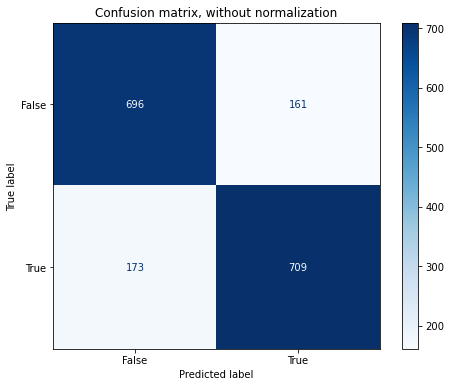

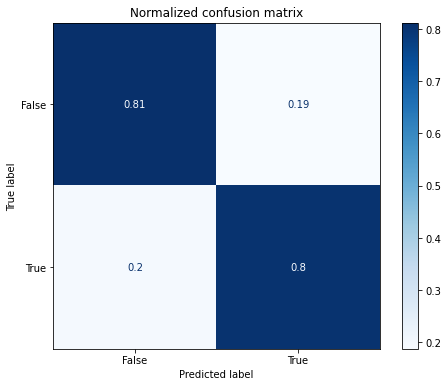

In [36]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gd,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [37]:
parametrs = {'criterion':['friedman_mse'],'subsample': list(np.arange(0.6,0.9,0.1)) ,'learning_rate': list(np.arange(0.06, 0.14, 0.01)), 'n_estimators':[300]}
gd_cv = GridSearchCV(GradientBoostingClassifier(),parametrs, n_jobs=-1, verbose=2, cv=kfold)

gd_cv.fit(X_train, y_train)

print(f"gd_cv.best_params_: {gd_cv.best_params_}")

print(f"gd_cv.best_estimator_: {gd_cv.best_estimator_}")

print(f"gd_cv.best_score_: {gd_cv.best_score_}")

print(f"f1_score {f1_score(y_test, gd_cv.predict(X_test))}")
print(f"precision_score {precision_score(y_test, gd_cv.predict(X_test))}")
print(f"recall_score {recall_score(y_test, gd_cv.predict(X_test))}")
print(f"accuracy_score {accuracy_score(y_test, gd_cv.predict(X_test))}")

# gd_cv.best_params_: {'subsample': 0.8999999999999999, 'n_estimators': 3000, 'learning_rate': 0.060000000000000005, 'criterion': 'friedman_mse'}
# accuracy_score 0.8205865439907993 - gd_cv.best_params_: {'subsample': 0.7999999999999999, 'n_estimators': 300, 'learning_rate': 0.08999999999999998, 'criterion': 'friedman_mse'}

Fitting 10 folds for each of 36 candidates, totalling 360 fits
gd_cv.best_params_: {'criterion': 'friedman_mse', 'learning_rate': 0.06, 'n_estimators': 300, 'subsample': 0.6}
gd_cv.best_estimator_: GradientBoostingClassifier(learning_rate=0.06, n_estimators=300, subsample=0.6)
gd_cv.best_score_: 0.8070185231125444
f1_score 0.8218100056211354
precision_score 0.8149386845039019
recall_score 0.828798185941043
accuracy_score 0.8177113283496262


Confusion matrix, without normalization
[[691 166]
 [151 731]]
Normalized confusion matrix
[[0.81 0.19]
 [0.17 0.83]]


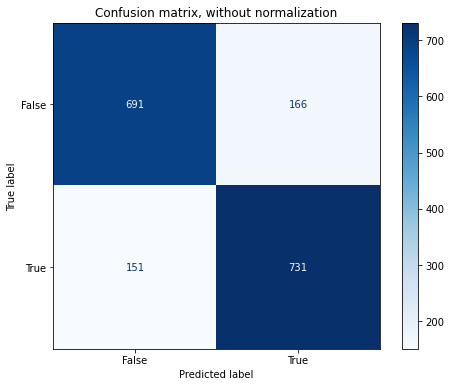

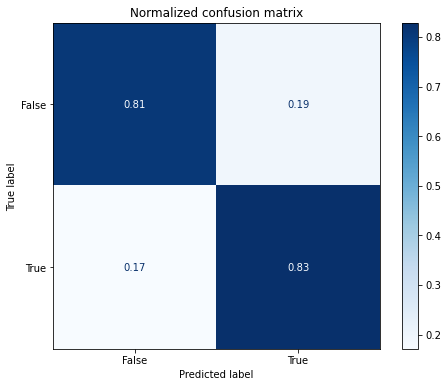

In [38]:
from sklearn.metrics import ConfusionMatrixDisplay

np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        gd_cv,
        X_test,
        y_test,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [39]:
predictions = gd_cv.predict(sub)

submission = pd.read_csv('C:/datasets/spaceship-titanic/sample_submission.csv')

submission['Transported'] = predictions

submission.to_csv('C:/datasets/spaceship-titanic/newest.csv', index=False)

pd.read_csv('C:/datasets/spaceship-titanic/newest.csv')

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,True
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True
